# Preprocessing

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:07<00:00, 24.1MB/s]
100% 149M/149M [00:07<00:00, 19.8MB/s]


In [27]:
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [28]:
tr_df = get_class_paths("/content/Training")

In [29]:
tr_df

Class Path       Class
0     /content/Training/meningioma/Tr-me_1245.jpg  meningioma
1     /content/Training/meningioma/Tr-me_0590.jpg  meningioma
2     /content/Training/meningioma/Tr-me_0153.jpg  meningioma
3     /content/Training/meningioma/Tr-me_0130.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0024.jpg  meningioma
...                                           ...         ...
5707   /content/Training/pituitary/Tr-pi_1392.jpg   pituitary
5708   /content/Training/pituitary/Tr-pi_1049.jpg   pituitary
5709   /content/Training/pituitary/Tr-pi_0248.jpg   pituitary
5710   /content/Training/pituitary/Tr-pi_0790.jpg   pituitary
5711   /content/Training/pituitary/Tr-pi_0477.jpg   pituitary

[5712 rows x 2 columns]

In [30]:
ts_df = get_class_paths("/content/Testing")

In [31]:
ts_df

Class Path       Class
0      /content/Testing/meningioma/Te-me_0208.jpg  meningioma
1      /content/Testing/meningioma/Te-me_0151.jpg  meningioma
2      /content/Testing/meningioma/Te-me_0046.jpg  meningioma
3      /content/Testing/meningioma/Te-me_0112.jpg  meningioma
4      /content/Testing/meningioma/Te-me_0034.jpg  meningioma
...                                           ...         ...
1306    /content/Testing/pituitary/Te-pi_0140.jpg   pituitary
1307    /content/Testing/pituitary/Te-pi_0011.jpg   pituitary
1308    /content/Testing/pituitary/Te-pi_0269.jpg   pituitary
1309  /content/Testing/pituitary/Te-piTr_0007.jpg   pituitary
1310    /content/Testing/pituitary/Te-pi_0215.jpg   pituitary

[1311 rows x 2 columns]

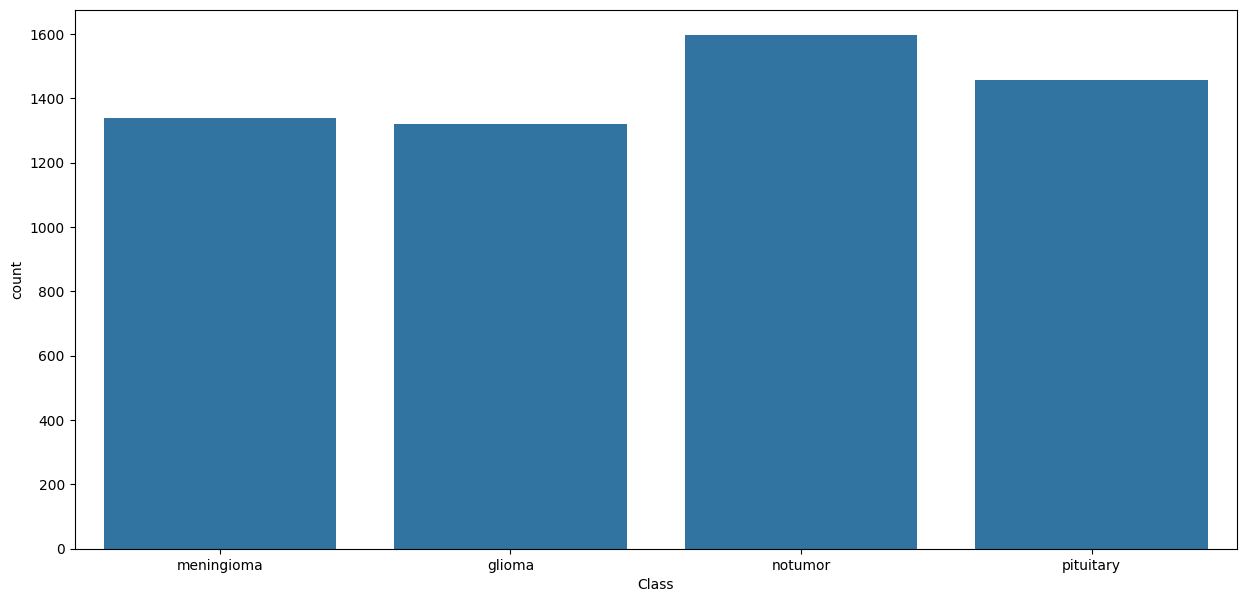

In [32]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

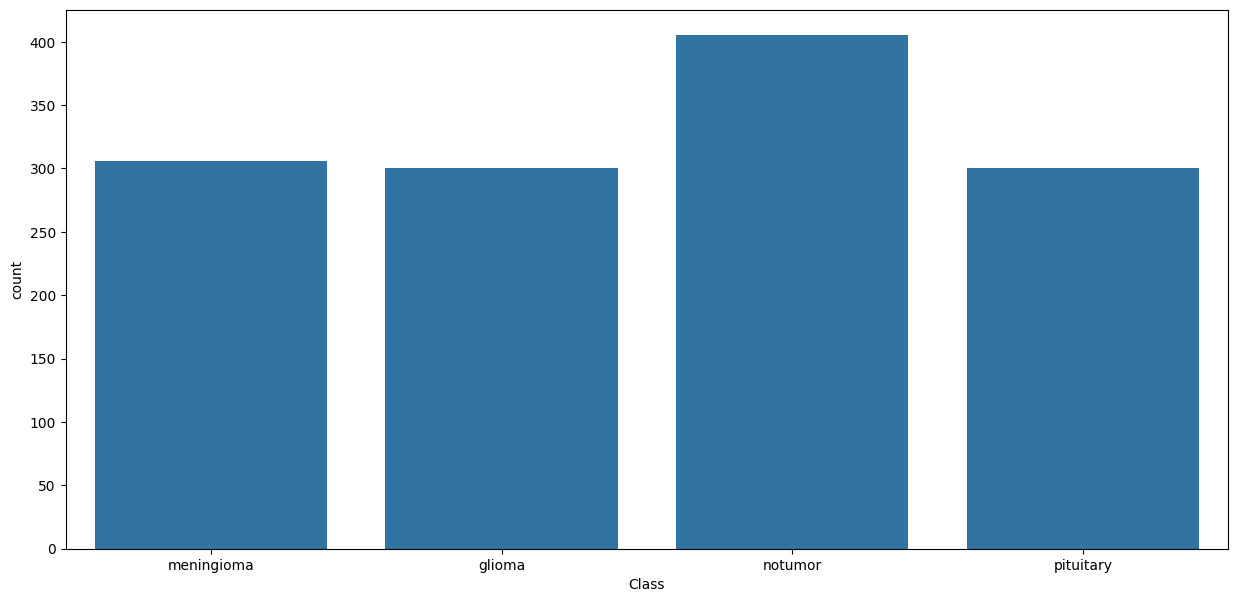

In [33]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [34]:
! pip install tensorflow

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [37]:
valid_df

Class Path       Class
737      /content/Testing/notumor/Te-no_0124.jpg     notumor
1066   /content/Testing/pituitary/Te-pi_0076.jpg   pituitary
158   /content/Testing/meningioma/Te-me_0258.jpg  meningioma
623      /content/Testing/notumor/Te-no_0073.jpg     notumor
1295   /content/Testing/pituitary/Te-pi_0127.jpg   pituitary
...                                          ...         ...
435       /content/Testing/glioma/Te-gl_0195.jpg      glioma
129   /content/Testing/meningioma/Te-me_0239.jpg  meningioma
796      /content/Testing/notumor/Te-no_0310.jpg     notumor
841      /content/Testing/notumor/Te-no_0038.jpg     notumor
1009     /content/Testing/notumor/Te-no_0115.jpg     notumor

[655 rows x 2 columns]

In [38]:
ts_df

Class Path       Class
219  /content/Testing/meningioma/Te-me_0067.jpg  meningioma
276  /content/Testing/meningioma/Te-me_0019.jpg  meningioma
344      /content/Testing/glioma/Te-gl_0128.jpg      glioma
127  /content/Testing/meningioma/Te-me_0302.jpg  meningioma
840     /content/Testing/notumor/Te-no_0105.jpg     notumor
..                                          ...         ...
720     /content/Testing/notumor/Te-no_0203.jpg     notumor
707     /content/Testing/notumor/Te-no_0196.jpg     notumor
725     /content/Testing/notumor/Te-no_0091.jpg     notumor
766     /content/Testing/notumor/Te-no_0195.jpg     notumor
463      /content/Testing/glioma/Te-gl_0027.jpg      glioma

[656 rows x 2 columns]

In [39]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [40]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


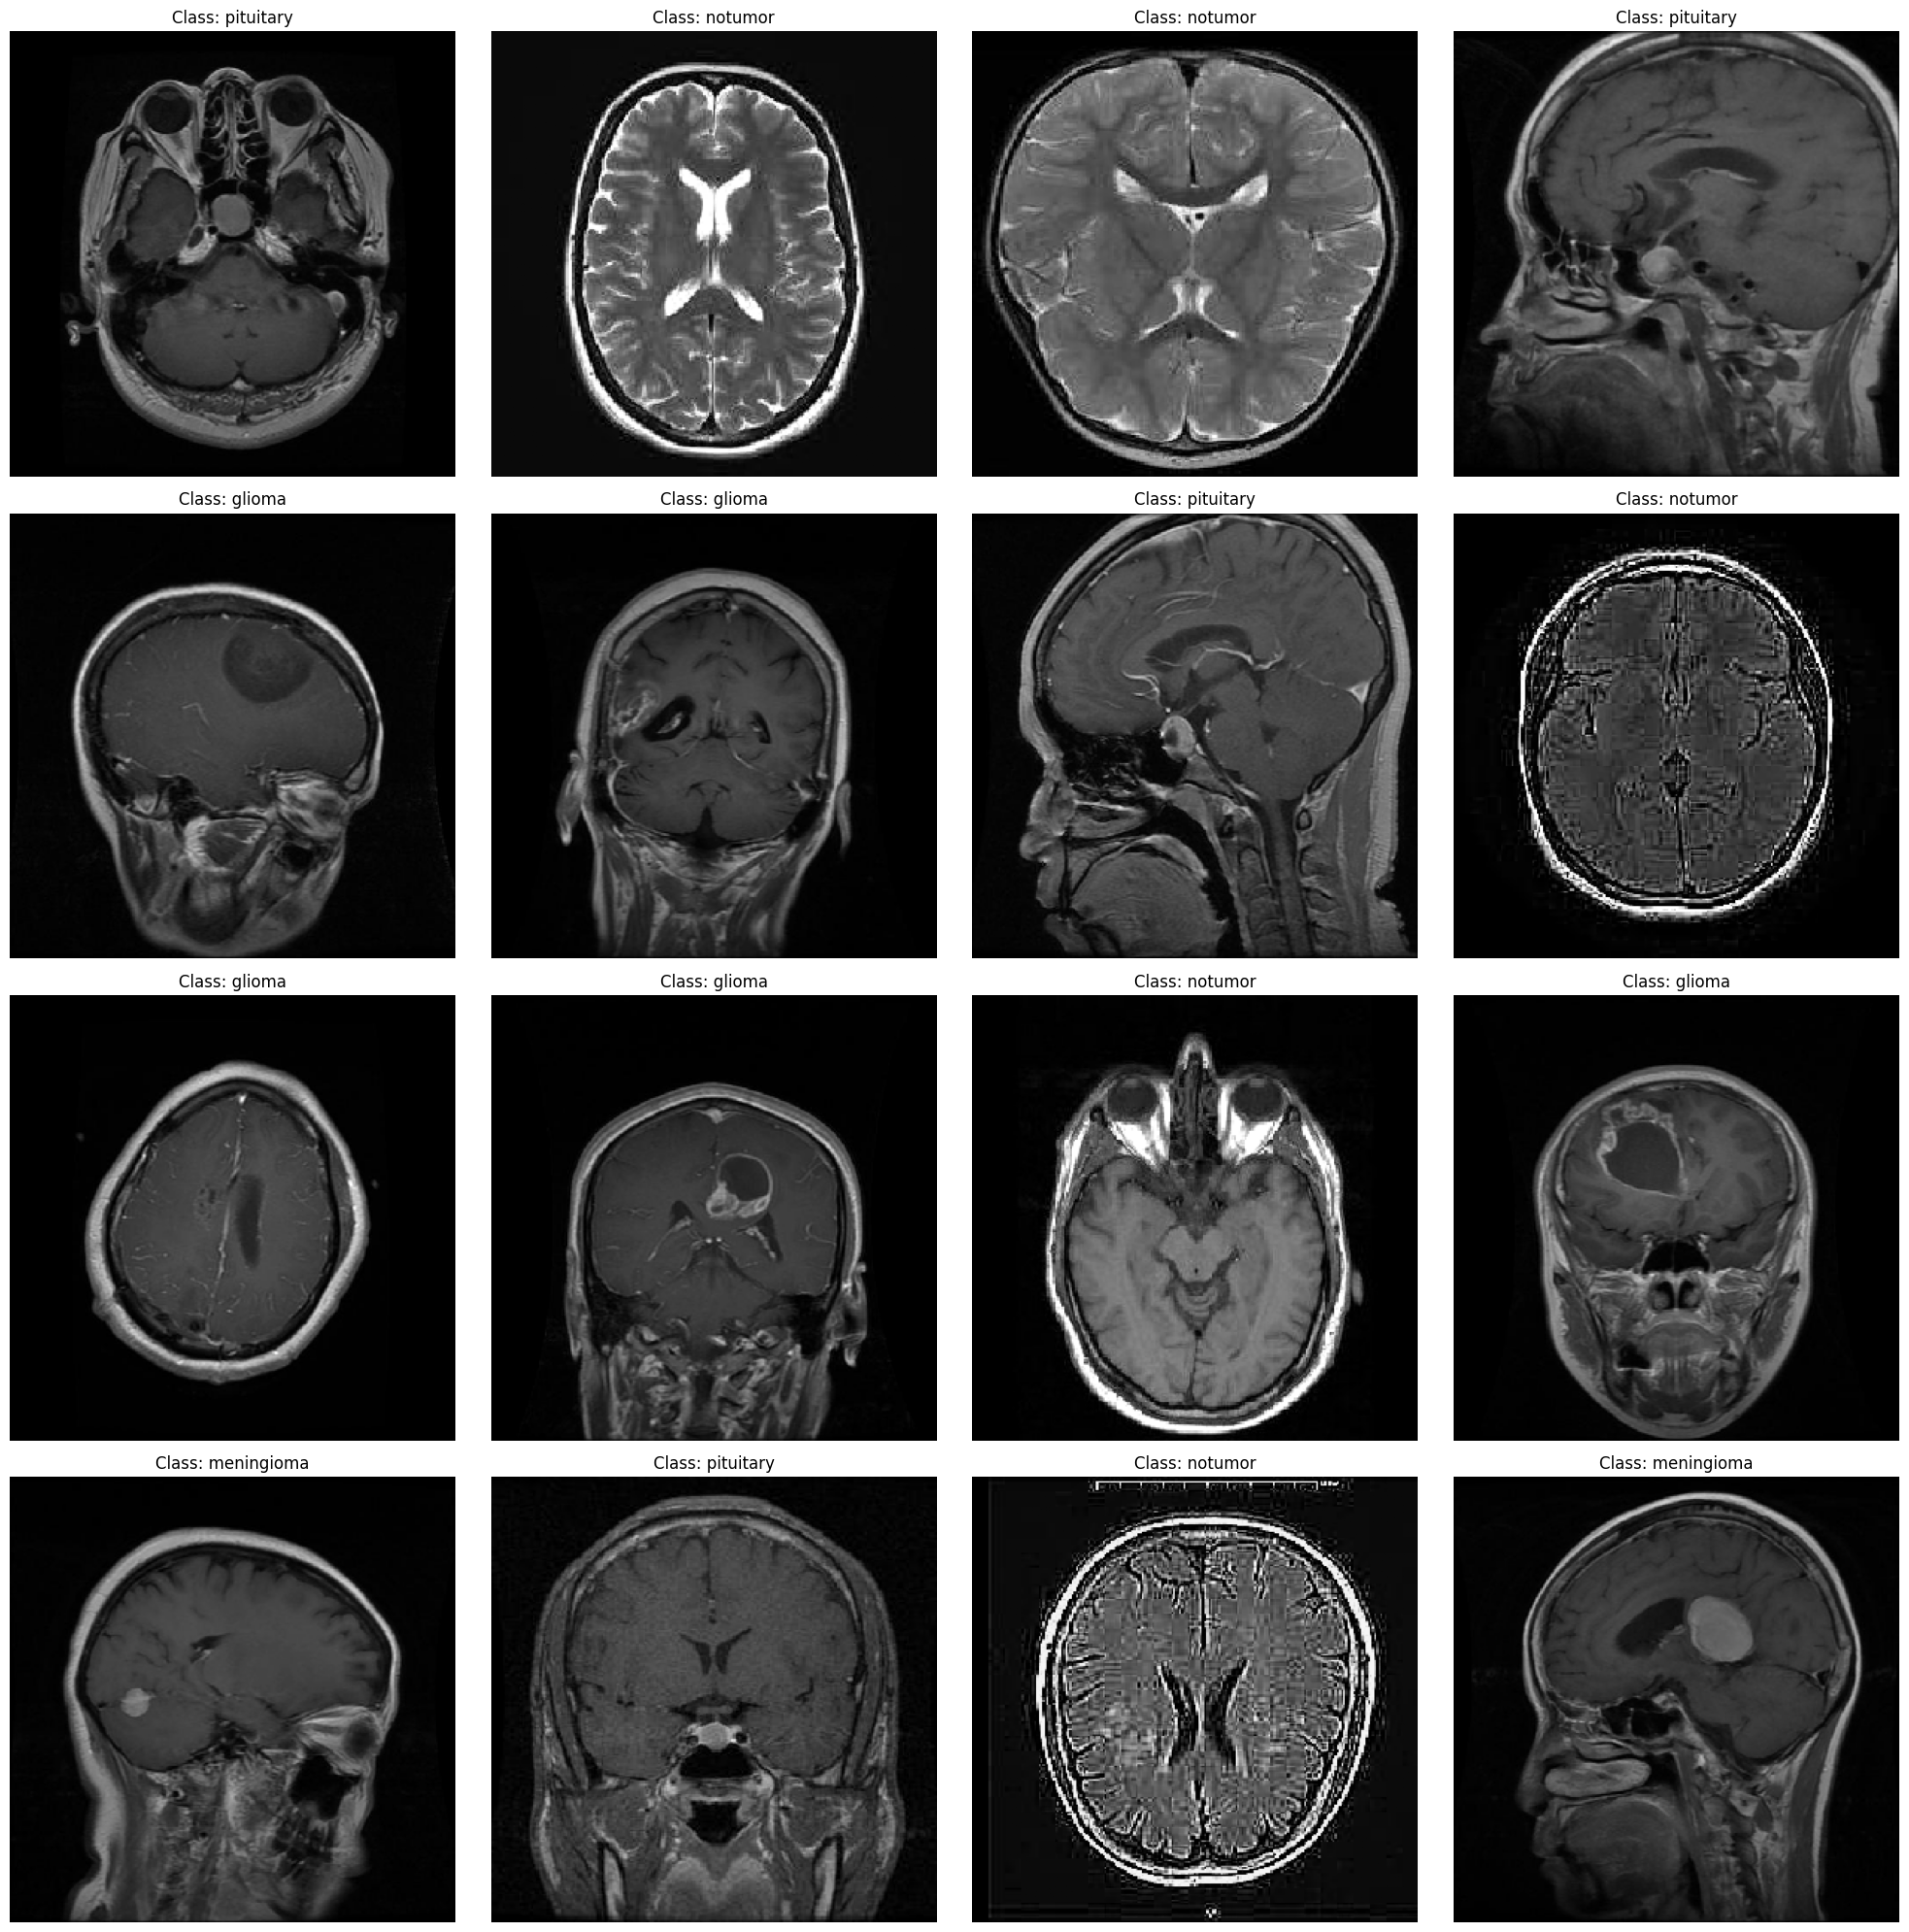

In [41]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

# *Xception* Model

In [42]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate=0.25),
    Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [43]:
model.compile(Adamax(learning_rate=0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        'precision',
                        'recall'])

In [44]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.6710 - loss: 0.9135 - precision: 0.7807 - recall: 0.5149 - val_accuracy: 0.8901 - val_loss: 0.3077 - val_precision: 0.8974 - val_recall: 0.8809
Epoch 2/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 778ms/step - accuracy: 0.9685 - loss: 0.0932 - precision: 0.9725 - recall: 0.9656 - val_accuracy: 0.9405 - val_loss: 0.1825 - val_precision: 0.9417 - val_recall: 0.9374
Epoch 3/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 798ms/step - accuracy: 0.9904 - loss: 0.0343 - precision: 0.9906 - recall: 0.9893 - val_accuracy: 0.9817 - val_loss: 0.0599 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 4/4
179/179 ━━━━━━━━━━━━━━━━━━━━ 192s 762ms/step - accuracy: 0.9946 - loss: 0.0167 - precision: 0.9951 - recall: 0.9944 - val_accuracy: 0.9740 - val_loss: 0.0863 - val_precision: 0.9740 - val_recall: 0.9740


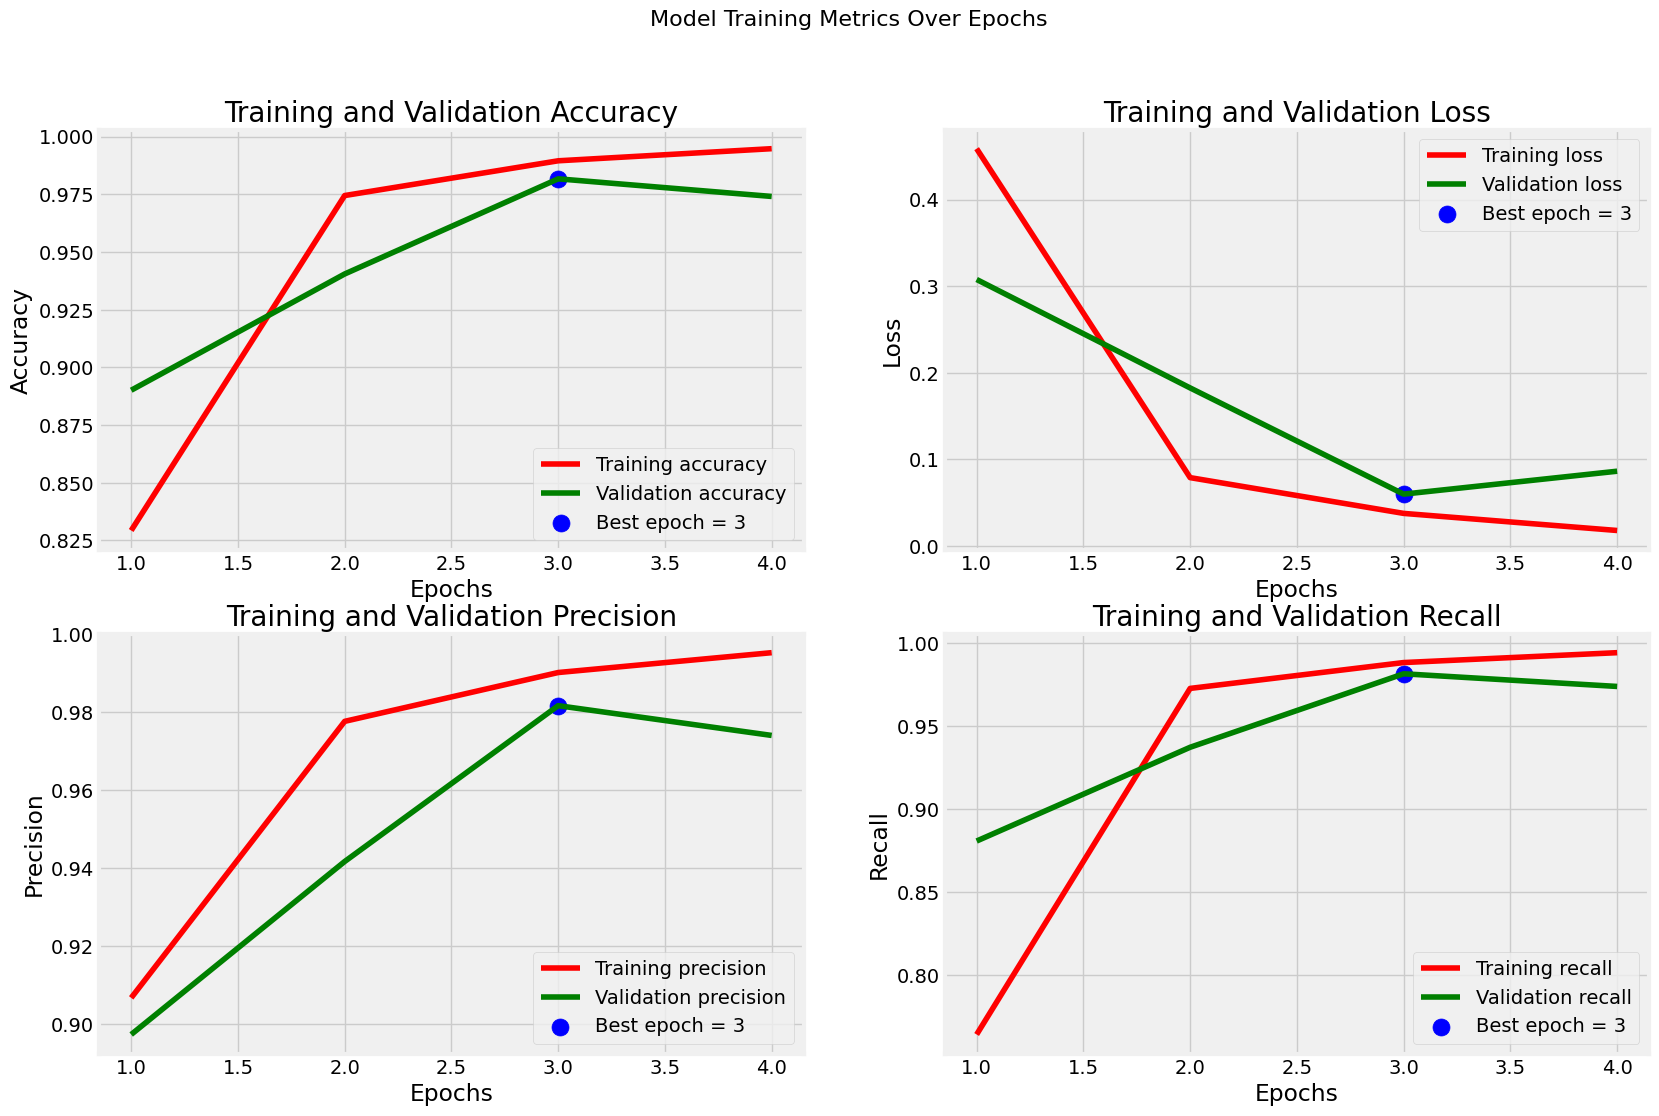

In [45]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [46]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:42f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 255ms/step - accuracy: 0.9978 - loss: 0.0074 - precision: 0.9978 - recall: 0.9978
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.9793 - loss: 0.0761 - precision: 0.9793 - recall: 0.9788


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.9830 - loss: 0.0663 - precision: 0.9830 - recall: 0.9830
Train Accuracy: 99.77%
Train Loss: 0.0080%


Validation Accuracy: 97.56%
Validation Loss:                                   0.086006


Test Accuracy: 98.17%
Test Loss: 0.0681


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step


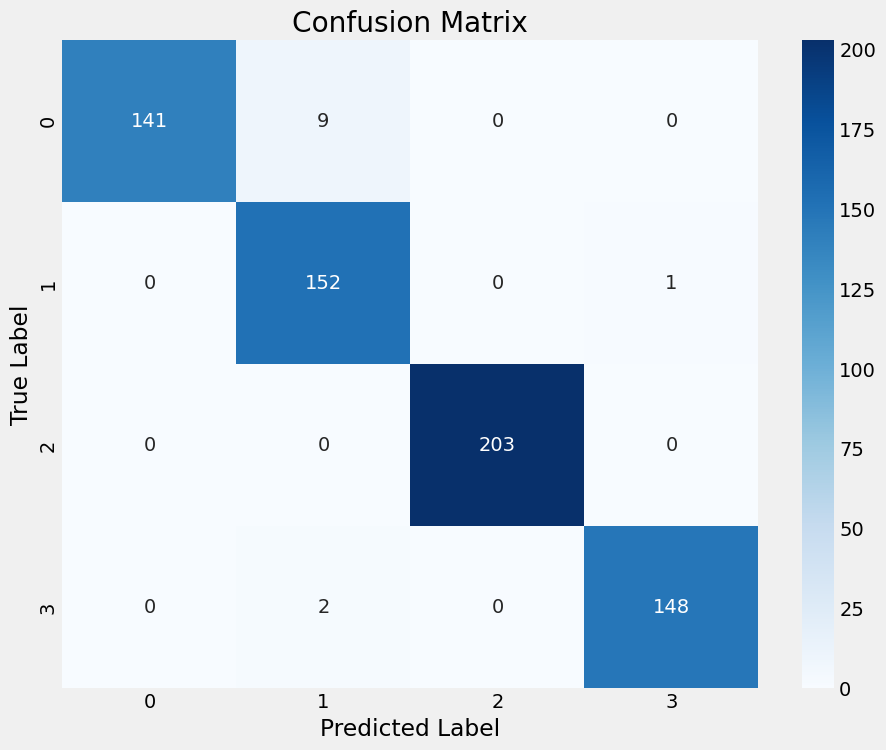

In [47]:
preds = model.predict(ts_gen)
y_pred =  np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


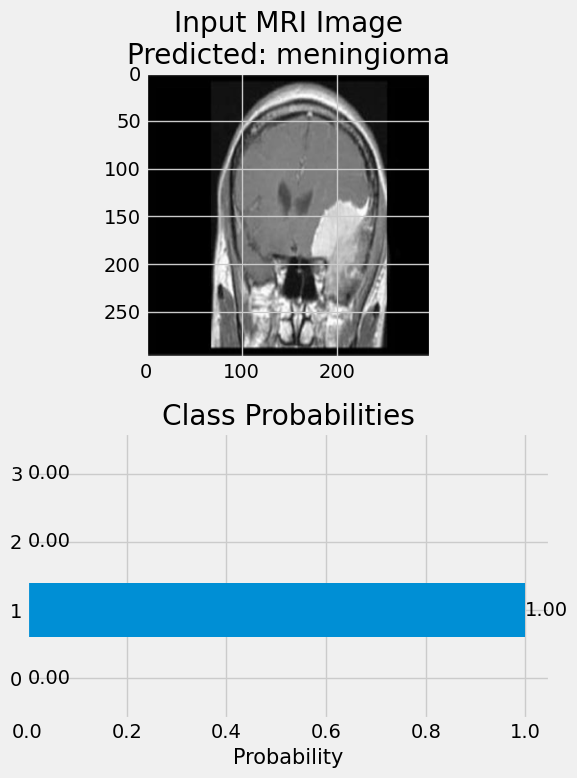


Predicted tumor type: meningioma


In [49]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


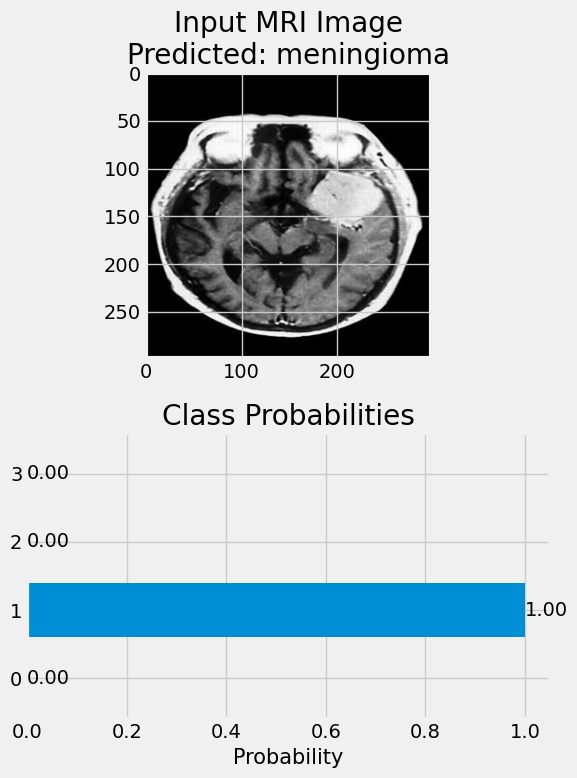


Predicted tumor type: meningioma


In [50]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


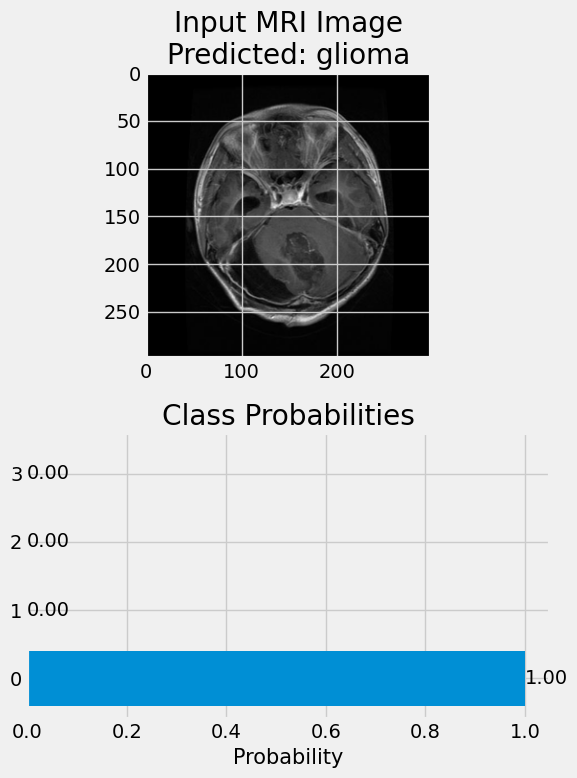


Predicted tumor type: glioma


In [51]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [52]:
model.save_weights("xception_model.weights.h5")

# Custom Convolution Network Model

In [53]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [54]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [55]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))   # Output later with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = cnn_model.fit(tr_gen, epochs=16, validation_data=valid_gen)

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 333ms/step - accuracy: 0.5617 - loss: 2.2402 - precision: 0.6739 - recall: 0.3752 - val_accuracy: 0.7664 - val_loss: 0.8627 - val_precision: 0.8024 - val_recall: 0.7130
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 160s 283ms/step - accuracy: 0.7944 - loss: 0.7605 - precision: 0.8210 - recall: 0.7571 - val_accuracy: 0.8153 - val_loss: 0.6232 - val_precision: 0.8358 - val_recall: 0.7771
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 297ms/step - accuracy: 0.8595 - loss: 0.5352 - precision: 0.8778 - recall: 0.8429 - val_accuracy: 0.8626 - val_loss: 0.5008 - val_precision: 0.8699 - val_recall: 0.8473
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 292ms/step - accuracy: 0.8892 - loss: 0.4405 - precision: 0.8981 - recall: 0.8790 - val_accuracy: 0.8885 - val_loss: 0.3972 - val_precision: 0.9011 - val_recall: 0.8763
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 139s 283ms/step - accuracy: 0.9110 - loss: 0.3711 - precision: 0.9196 - recall: 0.9022 - val_accuracy: 0

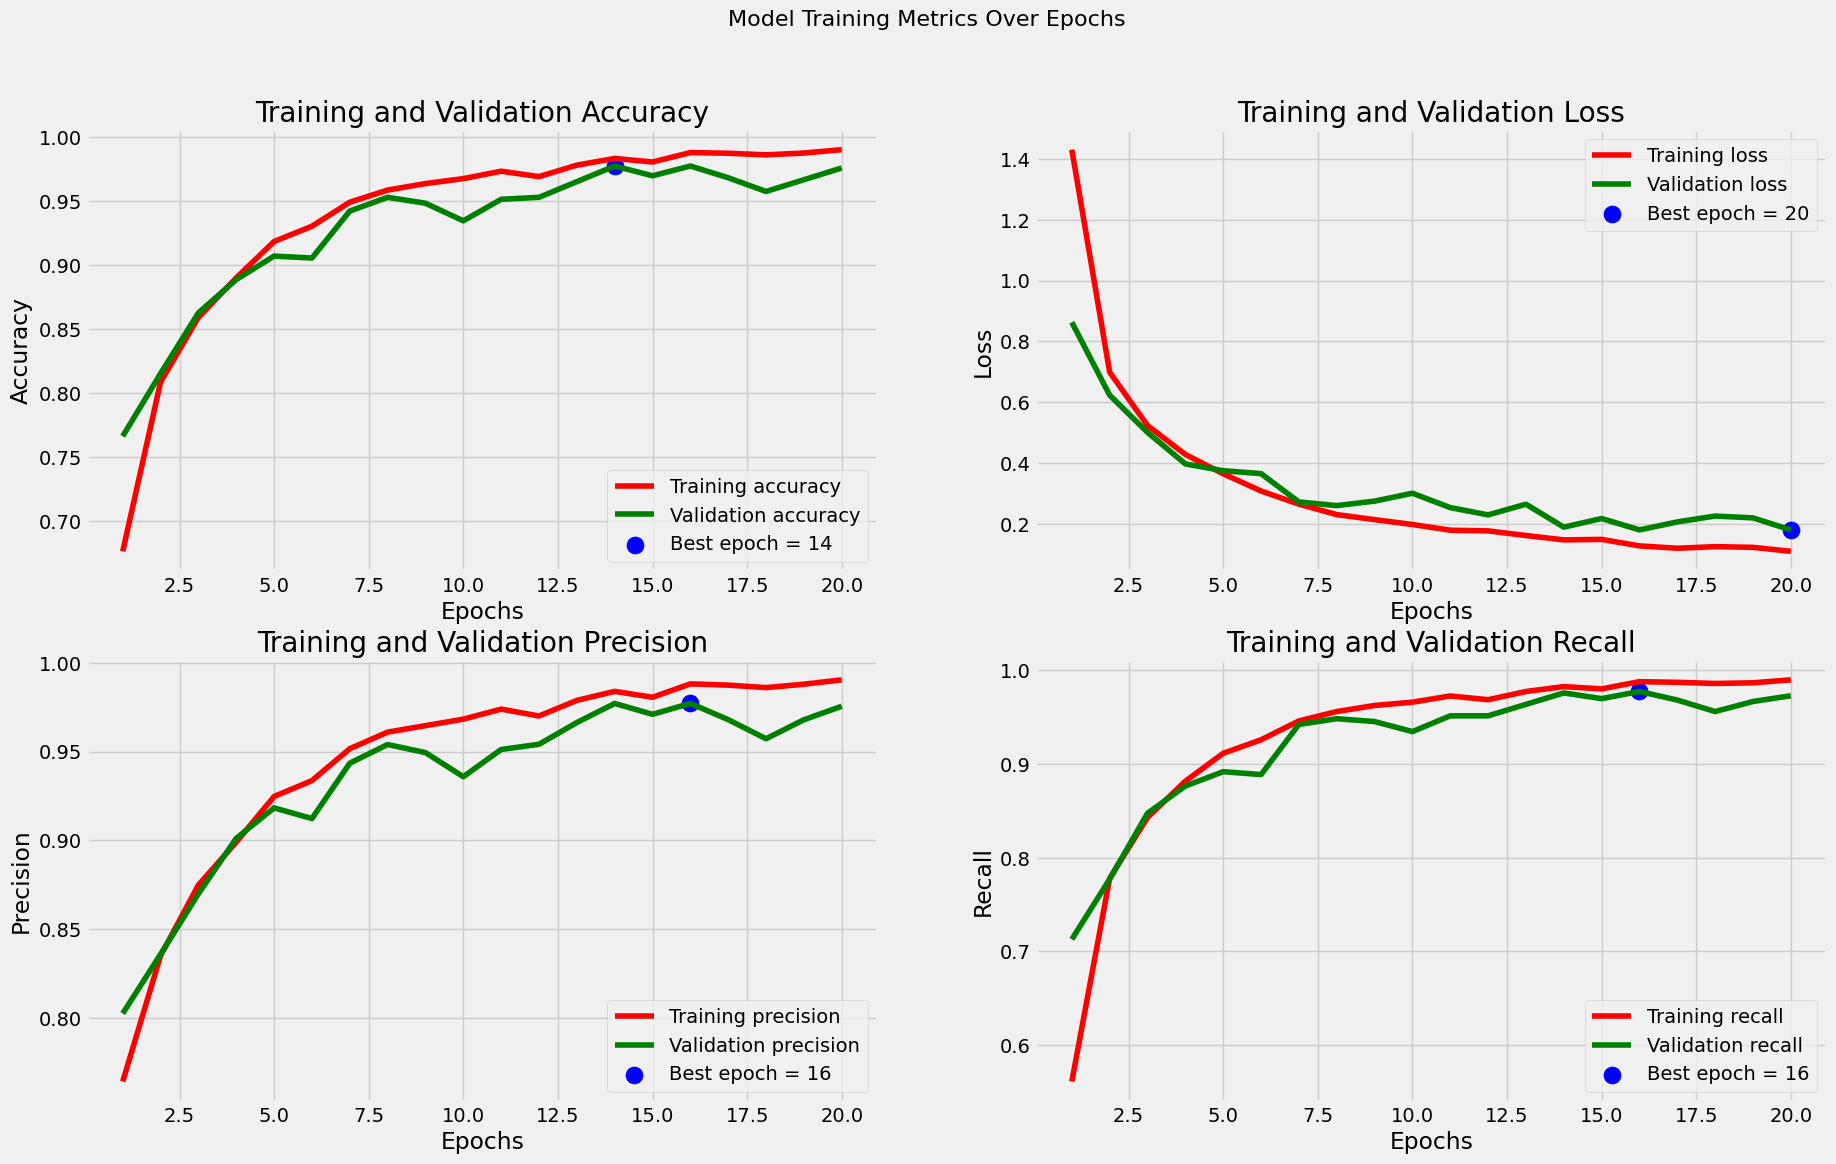

In [57]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [58]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:42f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.9948 - loss: 0.0951 - precision: 0.9948 - recall: 0.9943
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9673 - loss: 0.1659 - precision: 0.9691 - recall: 0.9667
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8125 - loss: 0.6466 - precision: 0.8125 - recall: 0.8125 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9484 - loss: 0.2578 - precision: 0.9484 - recall: 0.9484
Train Accuracy: 99.44%
Train Loss: 0.0969%


Validation Accuracy: 96.95%
Validation Loss:                                   0.182599


Test Accuracy: 96.19%
Test Loss: 0.2187


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step


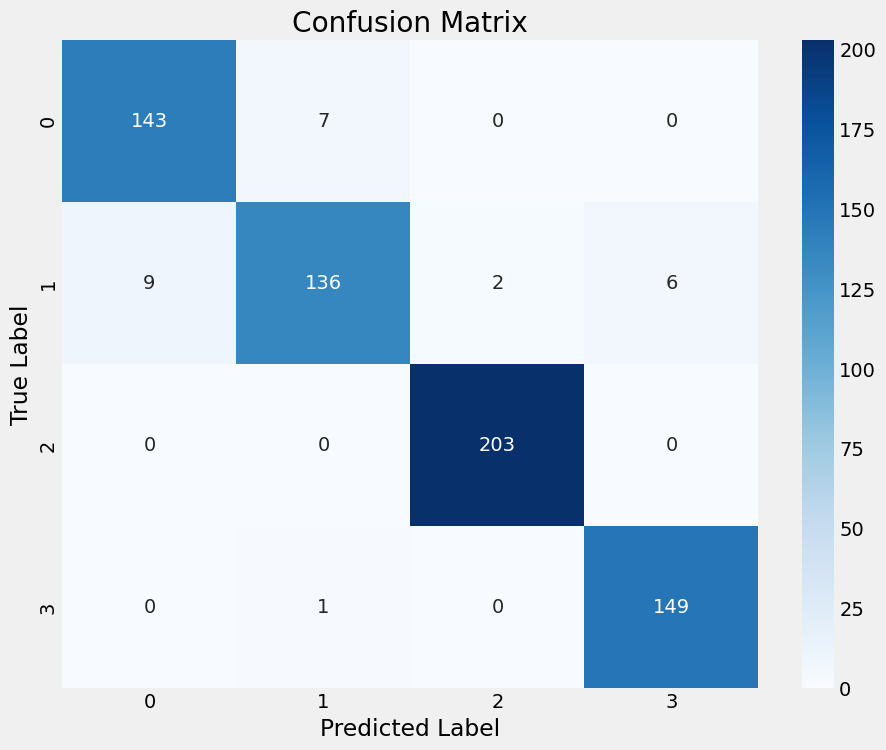

In [59]:
preds = cnn_model.predict(ts_gen)
y_pred =  np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       150
           1       0.94      0.89      0.92       153
           2       0.99      1.00      1.00       203
           3       0.96      0.99      0.98       150

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



In [61]:
cnn_model.save("cnn_model.h5")

# ResNet Model

In [68]:
img_shape = (224, 224, 3)

base_model = tf.keras.applications.ResNet152(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate=0.25),
    Dense(4, activation= 'softmax')
])

In [69]:
model.compile(Adamax(learning_rate=0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        'precision',
                        'recall'])

In [70]:
hist = model.fit(tr_gen, epochs=20, validation_data=valid_gen)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 325s 464ms/step - accuracy: 0.6799 - loss: 2.6945 - precision: 0.7039 - recall: 0.6513 - val_accuracy: 0.2336 - val_loss: 1.5777 - val_precision: 0.2662 - val_recall: 0.1695
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 174s 415ms/step - accuracy: 0.8591 - loss: 0.3901 - precision: 0.8826 - recall: 0.8402 - val_accuracy: 0.6412 - val_loss: 0.8325 - val_precision: 0.8077 - val_recall: 0.4489
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 202s 416ms/step - accuracy: 0.9048 - loss: 0.2826 - precision: 0.9132 - recall: 0.8924 - val_accuracy: 0.5679 - val_loss: 1.5863 - val_precision: 0.5726 - val_recall: 0.5420
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 202s 416ms/step - accuracy: 0.9233 - loss: 0.2407 - precision: 0.9338 - recall: 0.9130 - val_accuracy: 0.8076 - val_loss: 0.7497 - val_precision: 0.8117 - val_recall: 0.8031
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 148s 414ms/step - accuracy: 0.9435 - loss: 0.1868 - precision: 0.9480 - recall: 0.9397 - val_accuracy: 0

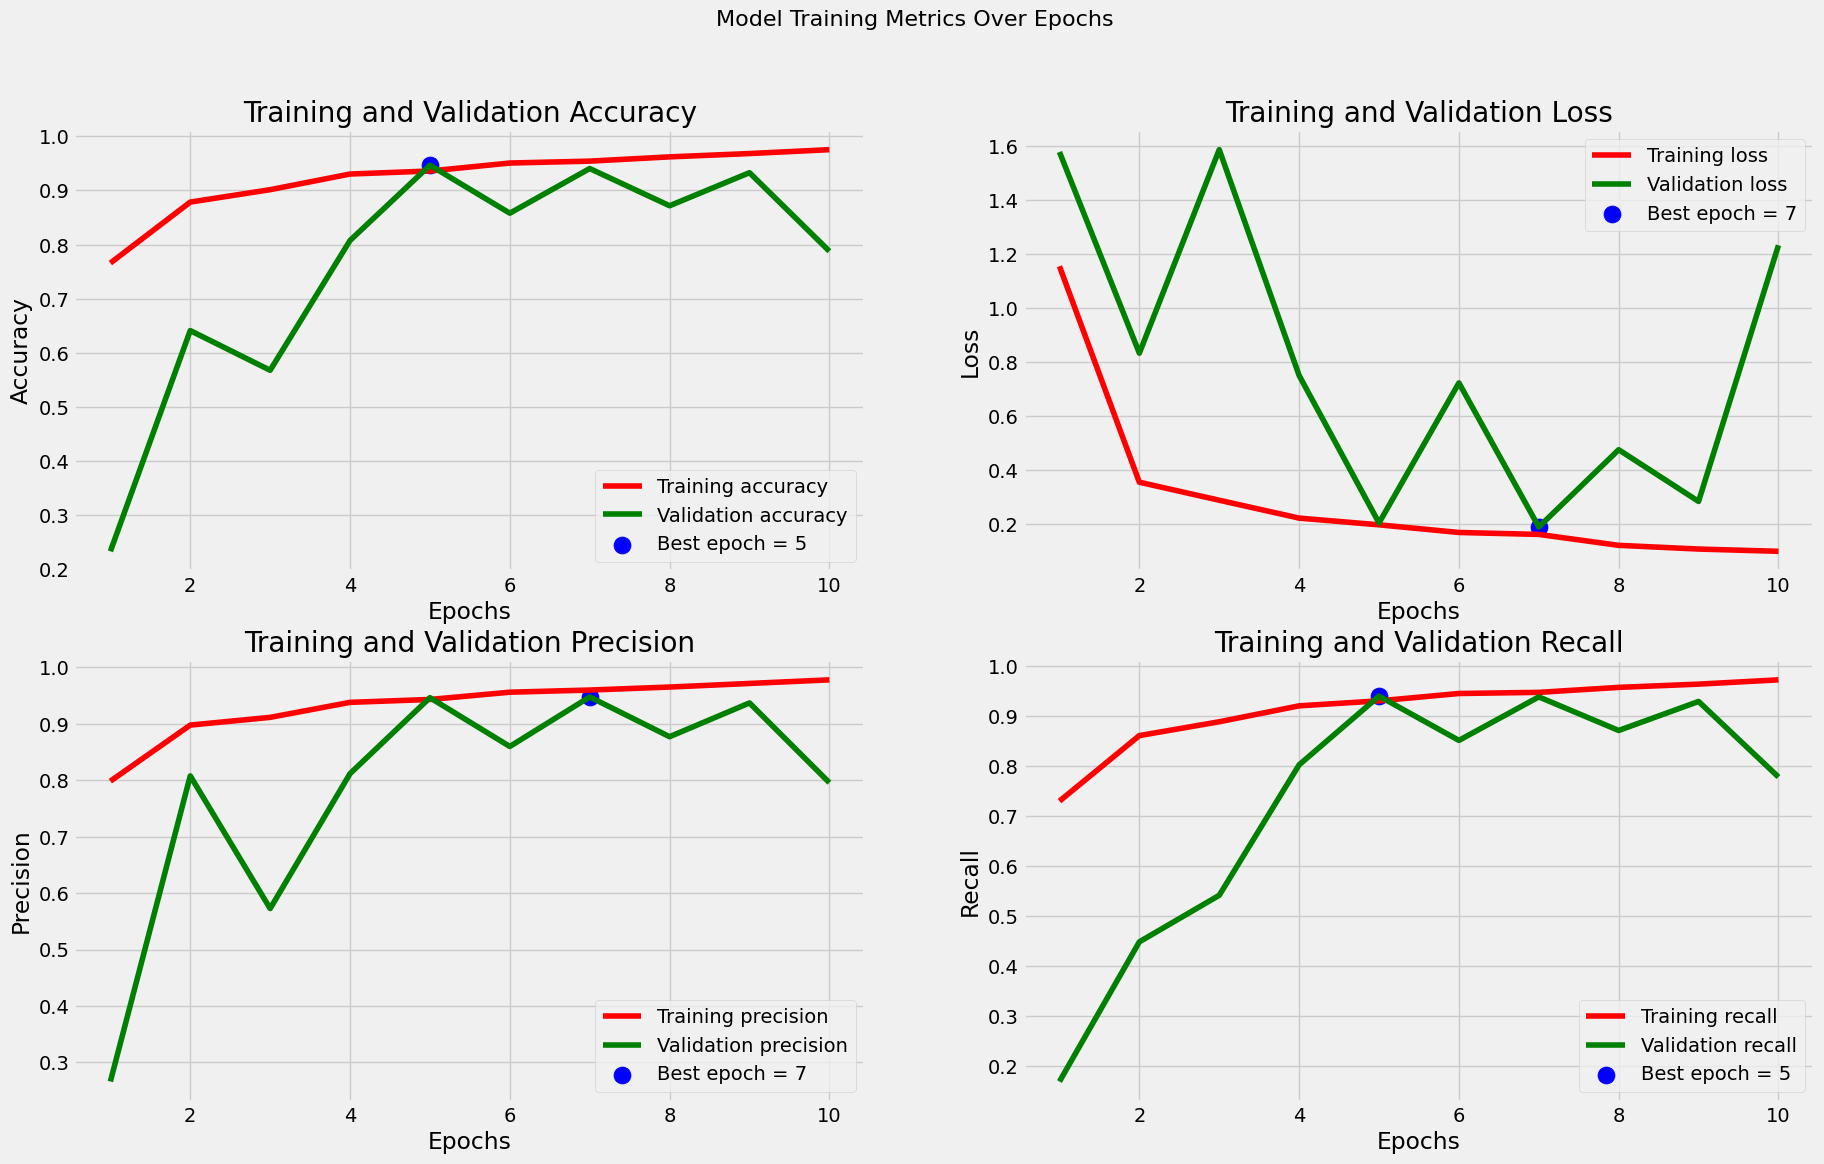

In [71]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [72]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:42f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 57s 160ms/step - accuracy: 0.7808 - loss: 1.2507 - precision: 0.7999 - recall: 0.7740
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7649 - loss: 1.3297 - precision: 0.7825 - recall: 0.7624
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.7842 - loss: 1.0925 - precision: 0.7993 - recall: 0.7765
Train Accuracy: 78.27%
Train Loss: 1.1948%


Validation Accuracy: 77.56%
Validation Loss:                                   1.233294


Test Accuracy: 76.68%
Test Loss: 1.1864


41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step


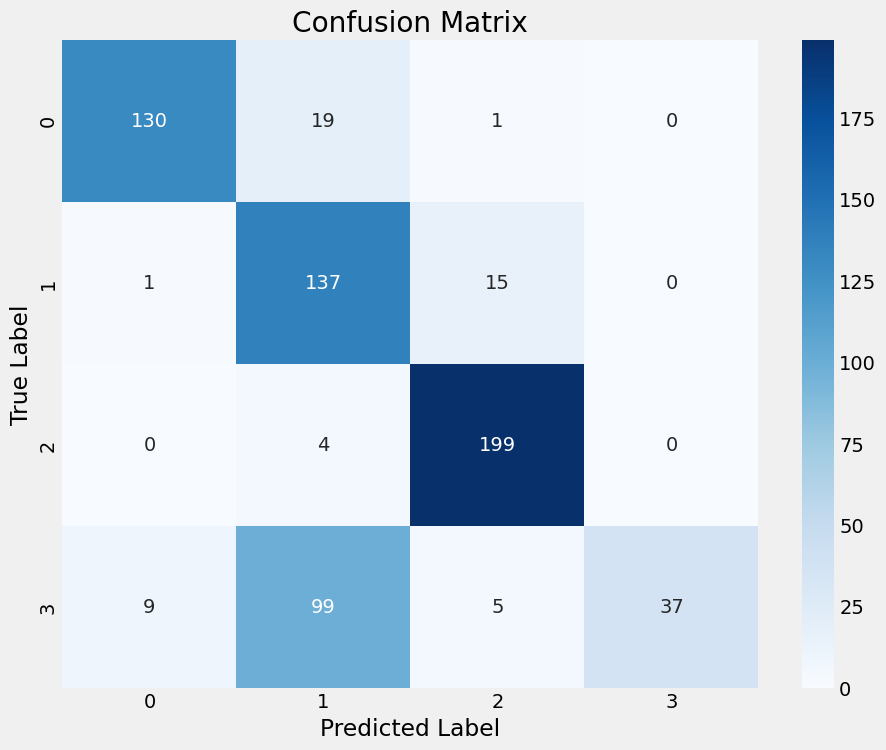

In [73]:
preds = model.predict(ts_gen)
y_pred =  np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((224, 224))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


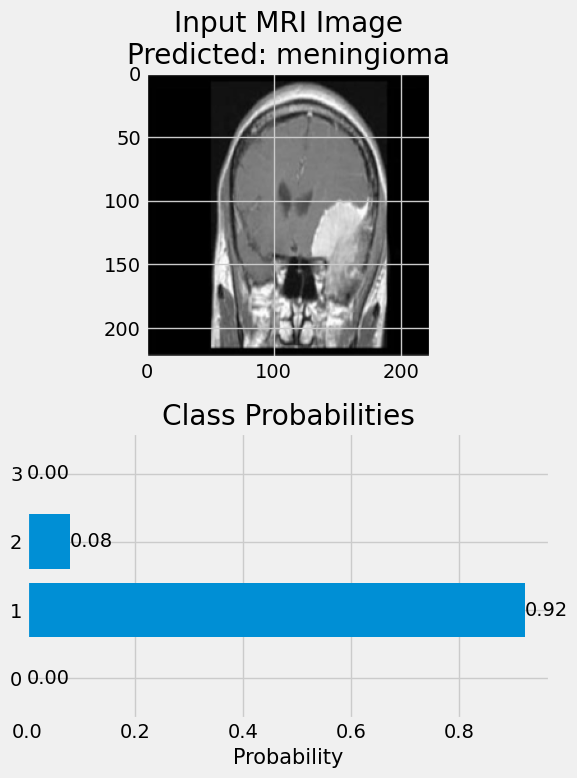


Predicted tumor type: meningioma


In [76]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


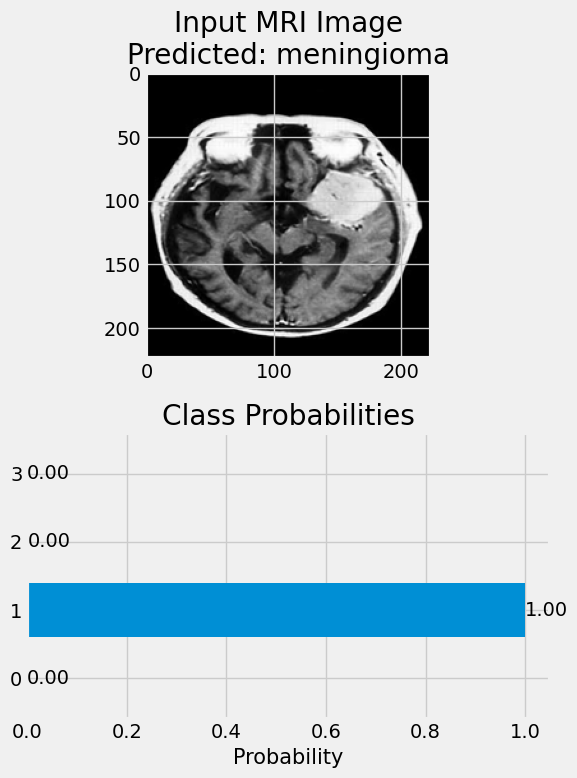


Predicted tumor type: meningioma


In [77]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


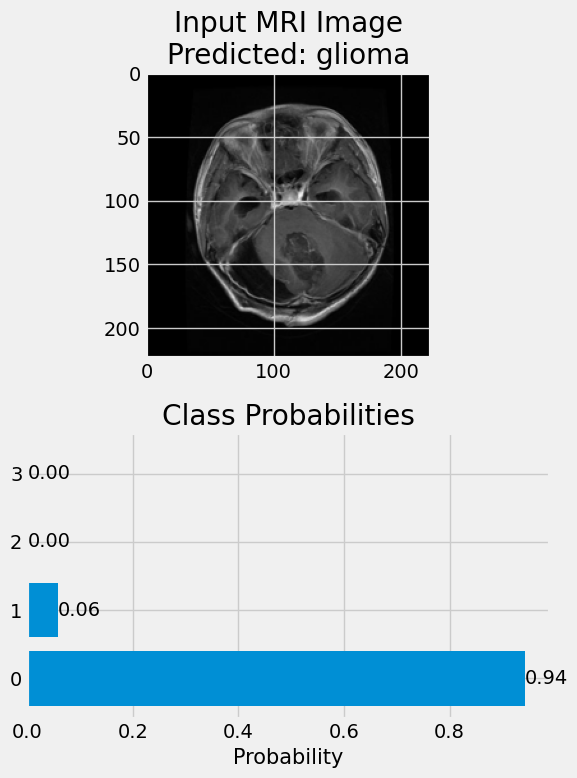


Predicted tumor type: glioma


In [78]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [79]:
model.save_weights("resnet_model.weights.h5")

# MobileNet Model

In [88]:
img_shape = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate=0.25),
    Dense(4, activation= 'softmax')
])

In [89]:
model.compile(Adamax(learning_rate=0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        'precision',
                        'recall'])

In [92]:
hist = model.fit(tr_gen, epochs=88, steps_per_epoch=(len(tr_df)//32), validation_data=valid_gen)

Epoch 1/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9838 - loss: 0.0739 - precision: 0.9841 - recall: 0.9830 - val_accuracy: 0.9053 - val_loss: 0.4144 - val_precision: 0.9051 - val_recall: 0.9023
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9883 - loss: 0.0456 - precision: 0.9886 - recall: 0.9883 - val_accuracy: 0.9115 - val_loss: 0.3225 - val_precision: 0.9141 - val_recall: 0.9099
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0043 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9053 - val_loss: 0.3386 - val_precision: 0.9081 - val_recall: 0.9053
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.9909 - loss: 0.0344 - precision: 0.9909 - recall: 0.9909 - val_accuracy: 0.9267 - val_loss: 0.3023 - val_precision: 0.9267 - val_recall: 0.9267
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9838 - loss: 0.0400 - precision: 0.9846 - recall: 0.9837 - val_accuracy: 0.9511 

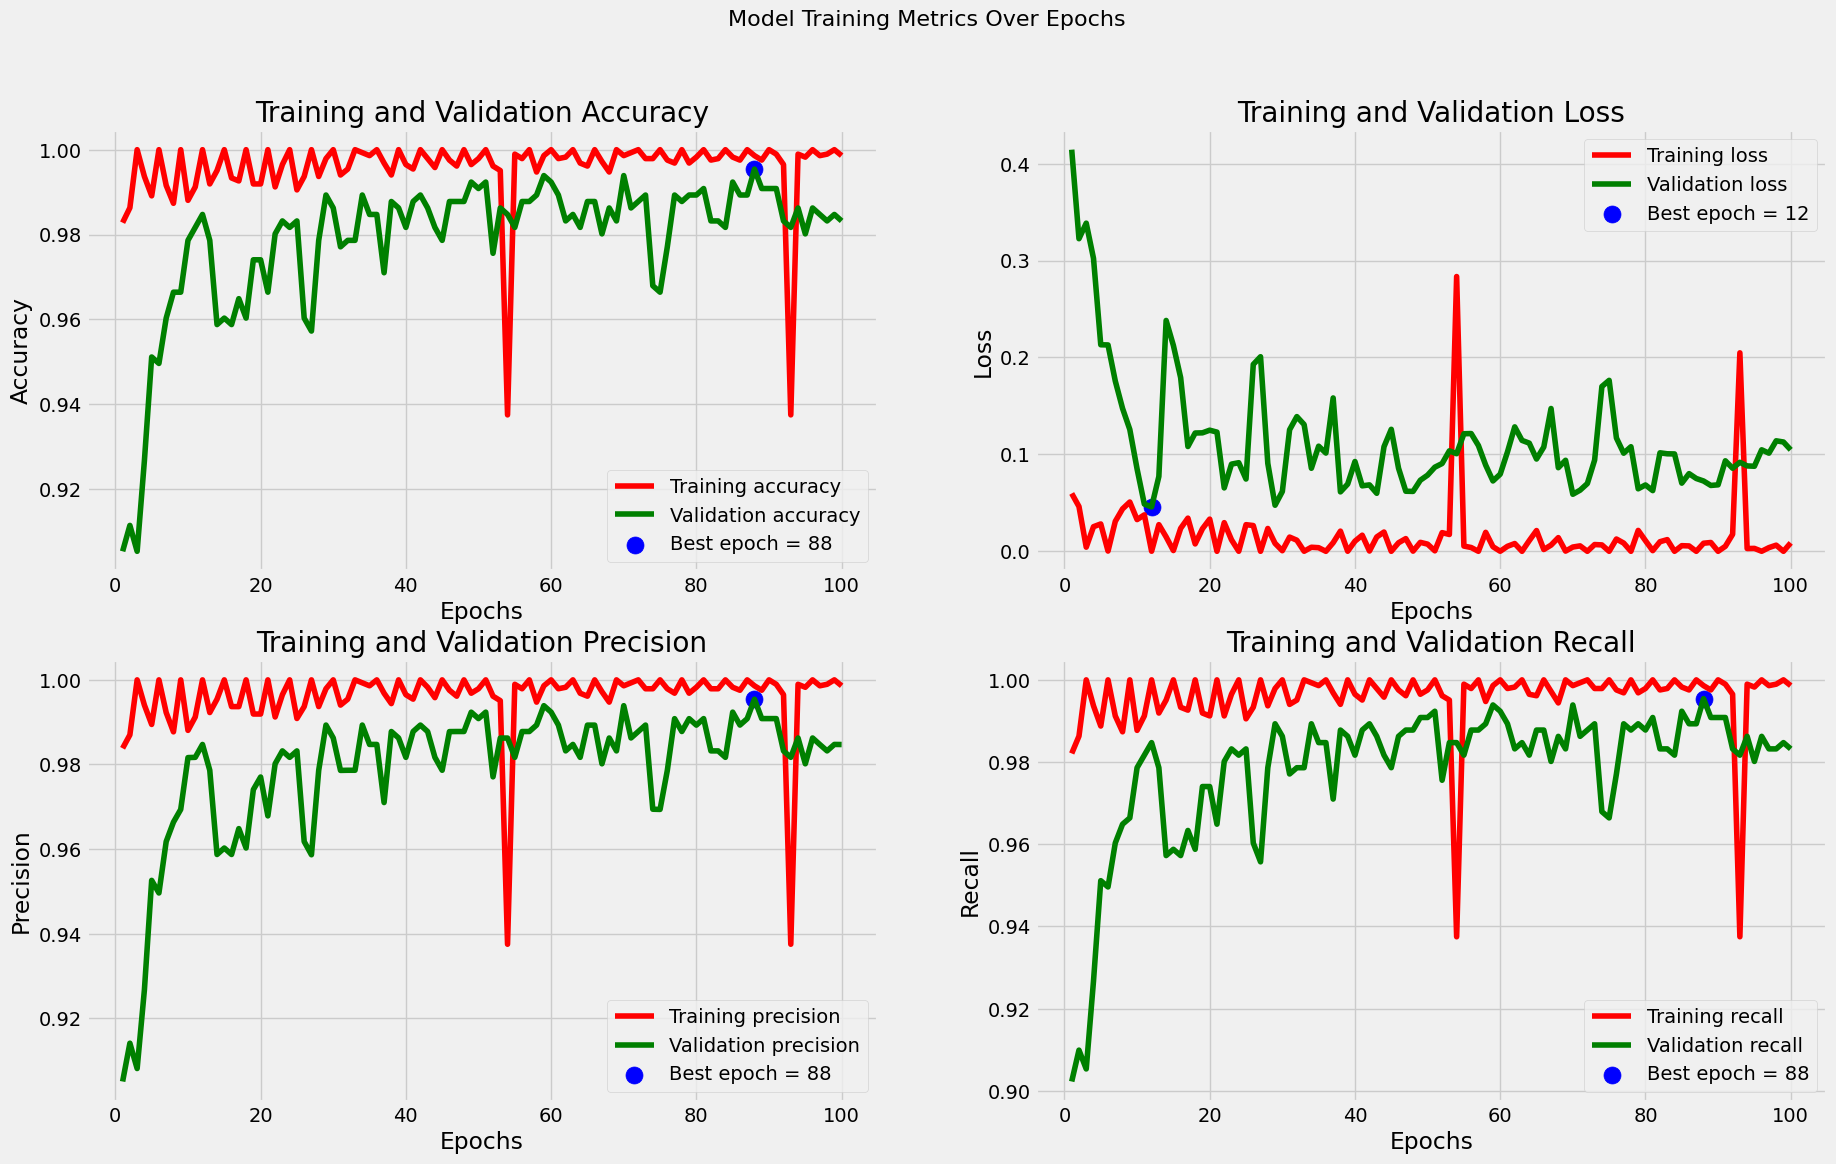

In [93]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find the best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [94]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:42f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 1.0000 - loss: 2.9539e-04 - precision: 1.0000 - recall: 1.0000
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9861 - loss: 0.0893 - precision: 0.9861 - recall: 0.9861
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9931 - loss: 0.0216 - precision: 0.9940 - recall: 0.9931
Train Accuracy: 99.96%
Train Loss: 0.0014%


Validation Accuracy: 98.47%
Validation Loss:                                   0.107471


Test Accuracy: 99.09%
Test Loss: 0.0297


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step


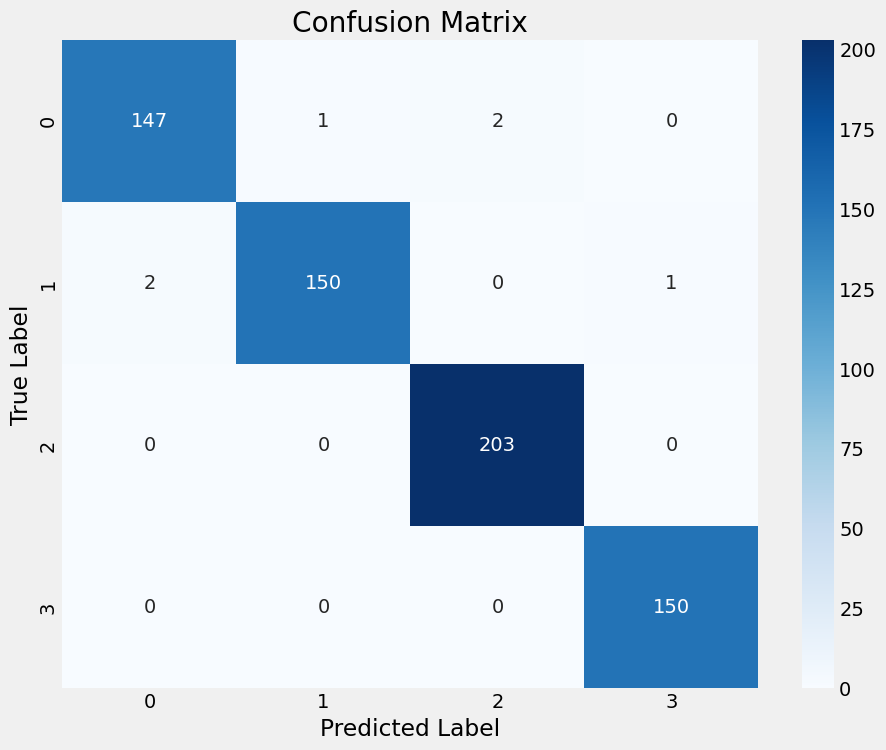

In [95]:
preds = model.predict(ts_gen)
y_pred =  np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [96]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((224, 224))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


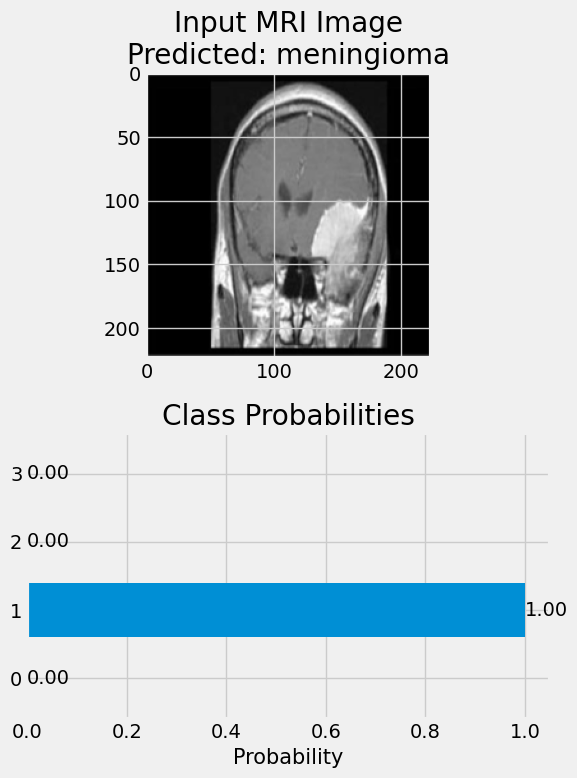


Predicted tumor type: meningioma


In [97]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


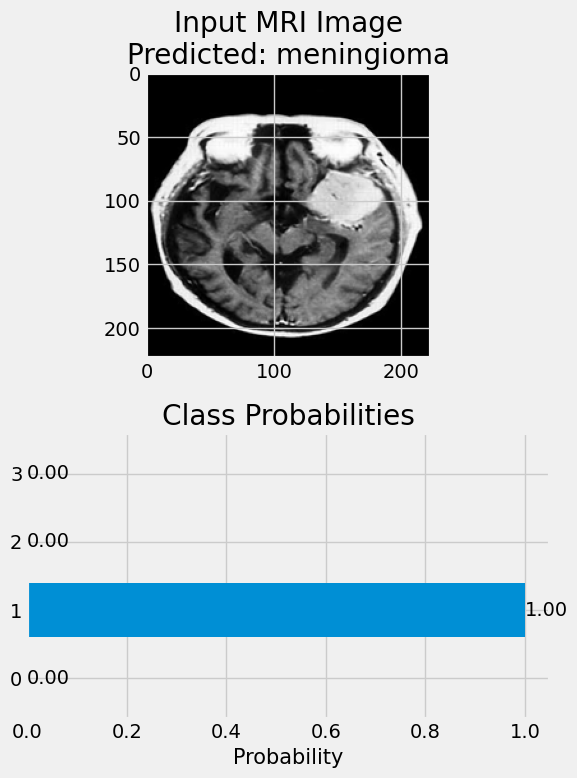


Predicted tumor type: meningioma


In [98]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


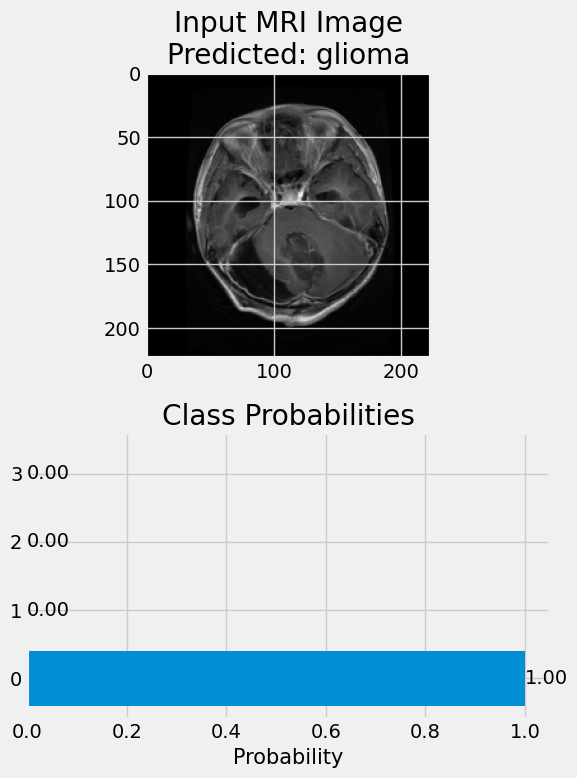


Predicted tumor type: glioma


In [99]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [100]:
model.save_weights("mobilenetv2_model.weights.h5")

# Streamlit Web App

In [70]:
! pip install streamlit pyngrok python-dotenv

In [1]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [2]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [3]:
def run_streamlit():
  import os
  os.system("streamlit run /content/app.py --server.port 3000")

In [54]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import openai as openai
from google.colab import userdata
import PIL.Image
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence, LLM):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors
  as either glioma, meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
  in light cyan, those are the regions where the focusing on.
  - Explain possible reasons why the model made the prediction it did.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are light cyan'
  in your explanation.
  - Keep your explanation to 4 sentences max.

  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name=LLM)
  response = model.generate_content([prompt, img])
  return response.text

def generate_chat(img_path, model_prediction, confidence, LLM, chat, query):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors
  as either glioma, meningioma, pituitary, or no tumor.

  You have already diagnosed the brain tumor to be '{model_prediction}' with a confidence of {confidence * 100}%.

  A user now wants to discuss the MRI scan and diagnosis results. Here is the most recent response you gave in the
  conversation: {chat}

  Now, the user is following up a query: {query}

  In your response:
  Answer the user to clarify any misunderstandings or confirm their theories using evidence as an expert. Defend your
  diagnosis if your confidence is relatively high, above 80%, but remain respectful of opinions and yield to the facts
  if the user brings up a very good point. Your stubbornness should reflect your confidence.

  - Keep your explanation to 4 sentences max.
  - Do not mention anything of models or predictions.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name=LLM)
  response = model.generate_content([prompt, img])
  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius =  min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match the original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img


def load_xception_model(model_path):
  img_shape=(299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


def load_resnet_model(model_path):
  img_shape=(224, 224, 3)
  base_model = tf.keras.applications.ResNet152(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


def load_mobilenet_model(model_path):
  img_shape=(224, 224, 3)
  base_model = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Xception", "Custom CNN", "ResNet152", "MobileNetV2")
  )

  if selected_model == "Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  elif selected_model == "Custom CNN":
    model = load_model('/content/cnn_model.h5')
    img_size = (224, 224)
  elif selected_model == "ResNet152":
    model = load_resnet_model('/content/resnet_model.weights.h5')
    img_size = (224, 224)
  else:
    model = load_mobilenet_model('/content/mobilenetv2_model.weights.h5')
    img_size = (224, 224)


  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")


  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map, caption='Saliency Map', use_container_width=True)


  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
    f"""
    <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
      <div style="display: flex; justify-content: space-between; align-items: center;">
        <div style="flex: 1; text-align: center;">
          <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
          <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
            {result}
          </p>
        </div>
        <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
        <div style="flex: 1; text-align: center;">
          <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
          <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
            {prediction[0][class_index]:.4%}
          </p>
        </div>
      </div>
    </div>
    """,
    unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f"{prob:.4%}",
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)

  st.write("Diagnosis Explanation:")
  explanation_model = st.radio(
      "Select LLM",
      ("Gemini Flash", "Gemini Flash Turbo", "Gemini Pro")
  )

  if explanation_model == "Gemini 2.0 Flash":
    LLM = "gemini-2.0-flash-exp"
  elif explanation_model == "Gemini 1.5 Pro":
    LLM = "gemini-1.5-pro"
  else:
    LLM = "gemini-1.5-flash"

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index], LLM)
  st.write("## Explanation")
  st.write(explanation)

  st.write("## Chat with Brain Tumor Neurologist Model")
  chat = explanation

  query = st.text_input("What would you like to know?")

  if (query != ""):
    chat = generate_chat(saliency_map_path, result, prediction[0][class_index], LLM, chat, query)
    st.write(chat)

Overwriting app.py


In [55]:
thread = Thread(target=run_streamlit)
thread.start()

In [57]:
public_url = ngrok.connect(addr='3000', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://a7a0-35-237-66-63.ngrok-free.app" -> "http://localhost:3000"


In [56]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://bf77-35-237-66-63.ngrok-free.app -> http://localhost:3000
